# Fundamental of Image Processing

During th course, we are going to use Python3 and some basic libraries to load, save, show and process images. 

**numpy** - numerical matemathics library, allows working with multidimensional arrays, includes optimised operators for vector and matrix.

**imageio** - is an input/output llibrary for images

**matplotlib** - is a plotting library for images and graphics

In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

In [28]:
# Read images
img1 = imageio.v2.imread("sudoku1.jpg")
img2 = imageio.v2.imread("sudoku2.jpg")

(-0.5, 581.5, 581.5, -0.5)

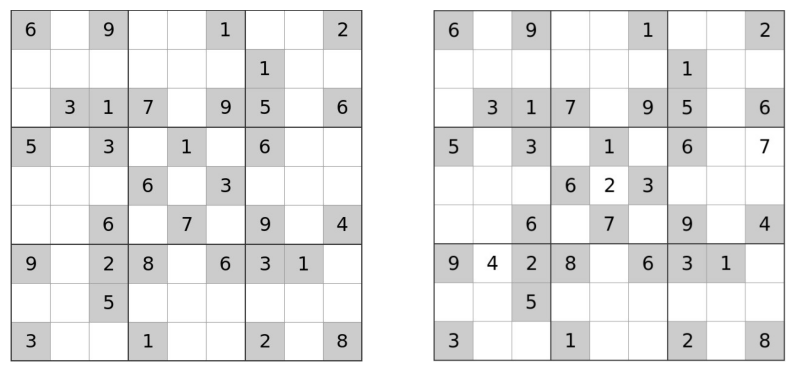

In [33]:
# Show images
plt.figure(figsize=(10,10))

plt.subplot(121)
plt.imshow(img1, cmap='gray')
plt.axis('off')

plt.subplot(122)
plt.imshow(img2, cmap='gray')
plt.axis('off')

In this example we are going to detect the differences between the two images in order to find in which cells there are different numbers.

To do so, the simplest (but not fastest) way is to go through all pixels explicitly using two loops, and subtracting each pair of pixels.

The result of the subtraction is stored in a new matrix that is initialized with zeros. Note that, in order to allow subtracting the images pixel by pixel, we need to ensure both have the same dimensions.

In [34]:
img1 = img1[:,:,0]
img2 = img2[:,:,0]

size1 = img1.shape
size2 = img2.shape

assert size1 == size2

In [37]:
img_sub = np.zeros(size1, dtype=float)

for x in range(size1[0]):
    for y in range(size1[1]):
        img_sub[x,y] = float(img1[x,y]) - float(img2[x,y])

The resulting image can be showm with the **matplotlib**

Also, the colorbar can be displayed on the right hand side so we can be able to inspect which values were mapped to the different gray levels.

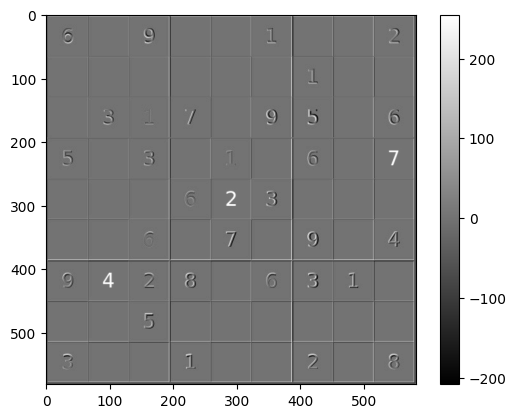

In [38]:
plt.imshow(img_sub, cmap='gray')
plt.colorbar()

Note the range of values goes from negative to positive values. Checking exactly which are those values:

In [41]:
print("Min value: ", np.min(img_sub))
print("Max value: ", np.max(img_sub))

Min value:  -208.0
Max value:  255.0


This is not good since we wish to represent each pixel using 8 bits. To allow storing and displaying the image correctly, we must normalise the image to the range [0 - 255].

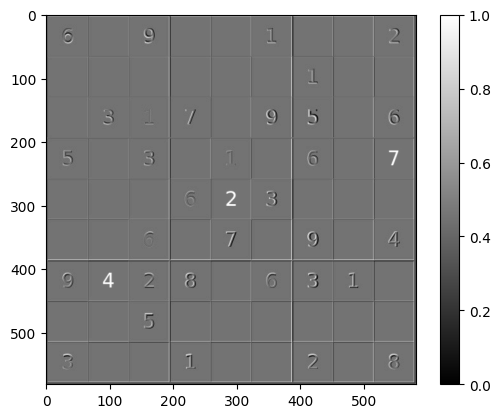

In [43]:
# Get max and min values
imax = np.max(img_sub)
imin = np.min(img_sub)

# Normalize the image so that min becomes 0 and max 1
img_sub_norm = (img_sub - imin) / (imax - imin)

plt.imshow(img_sub_norm, cmap='gray')
plt.colorbar()

Note that the colorbar changed. Now we can multiply the whole image by 255 and then convert to a 8 bit representation (unsigned int with 8 bits)

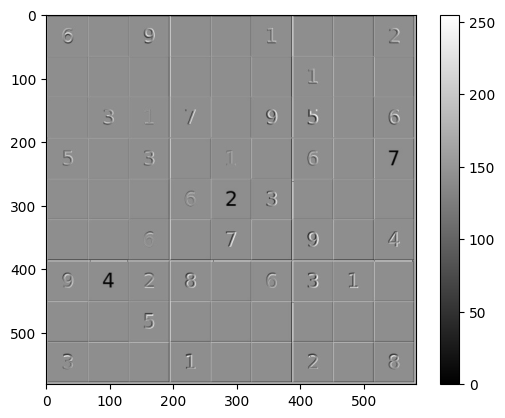

In [45]:
img_sub_norm = (img_sub_norm * 255).astype(np.uint8)

plt.imshow(img_sub_norm, cmap='gray')
plt.colorbar()